In [49]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
# Standard Library
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import pandas as pd
from pprint import pprint
import csv

from wordcloud import WordCloud, STOPWORDS
from wordcloud import STOPWORDS
from scipy.misc import imread



# Custom Library
os.chdir('/Users/Bya/git/predictEPL/')
from MyFunctions import dataIO
from MyFunctions import plotPie
hashPath = "/Users/Bya/git/EPLdata/"
os.chdir(hashPath)
from config import Hashtags

In [3]:
def Wordle(text):
    twitter_mask = imread('/Users/Bya/git/predictEPL/Wordle/twitter_mask.png', flatten=True)
#     STOPWORDSS = STOPWORDS.union(more_stopwords)
    wordcloud = WordCloud(background_color="black", \
                          width=900, \
                          height=500, \
#                           font_path='/Library/Fonts/CabinSketch-Bold.ttf',\
                          font_path='/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc',\
                          stopwords=STOPWORDS,\
                          mask=twitter_mask\
                         ).generate(text)
    
    plt.figure(figsize=(15, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
#     plt.savefig('./my_twitter_wordcloud_2.png', dpi=300)
    plt.show()

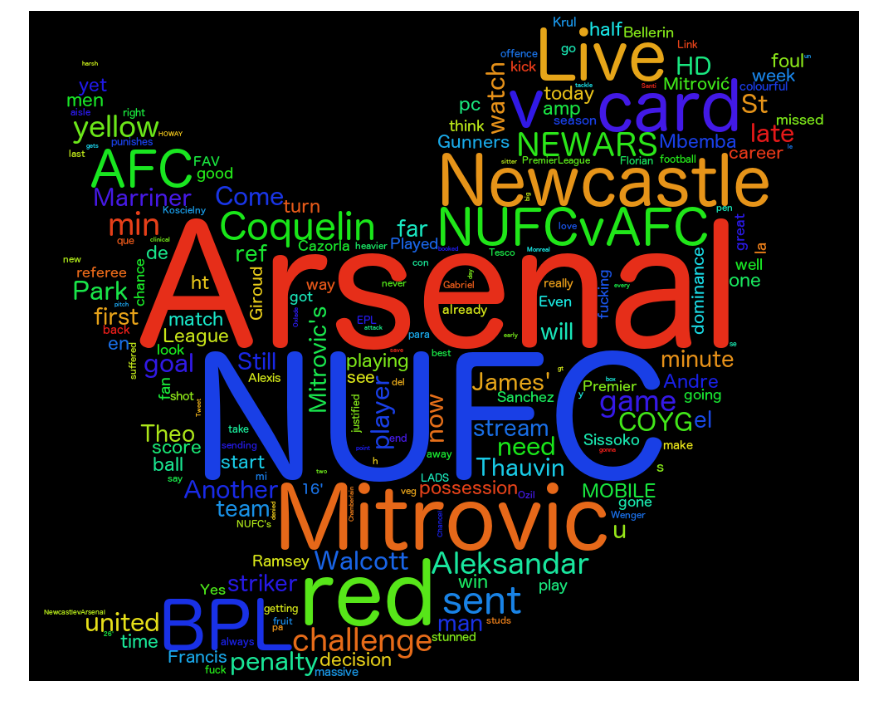

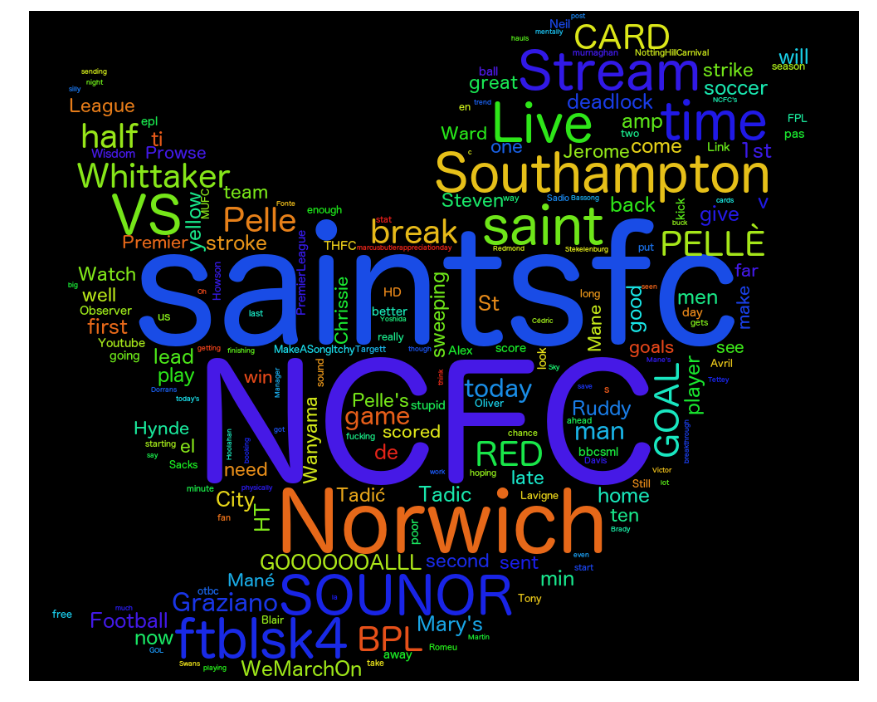

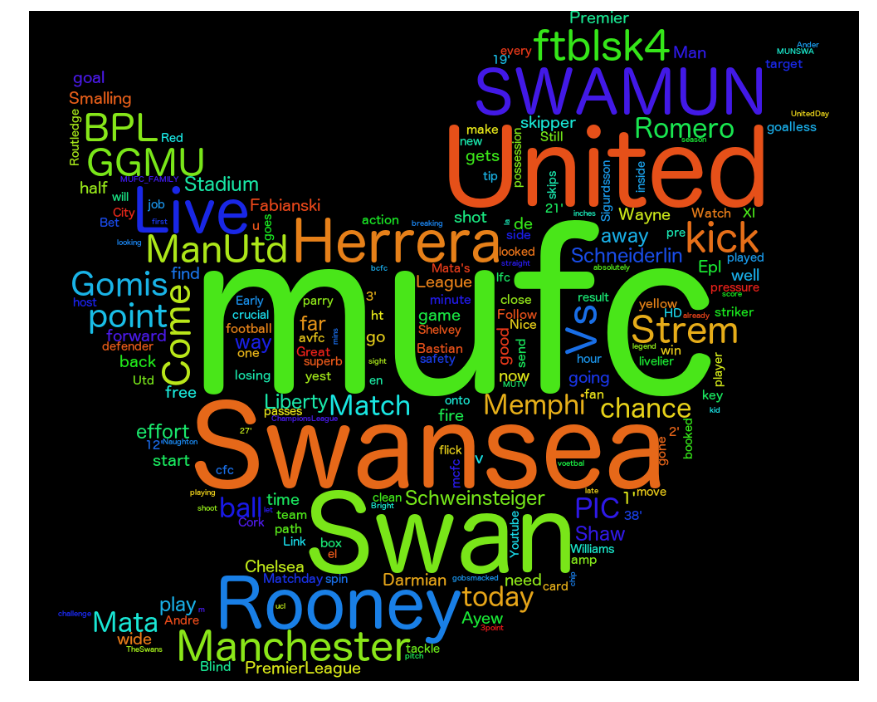

In [5]:
loadFileNameGW4 = ["/Users/Bya/Dropbox/Research/datas/GW4/1508292045_NUFCvsARSENAL_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508302130_SAINTSvsNCFC_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508310000_SWANSvsMUFC_json.txt.csv",]

for i in range(len(loadFileNameGW4)):
    dfTweets = dataIO.CSVtoDF(loadFileNameGW4[i], ['date', 'text', 'user', 'tags'])
    # join tweets to a single string
    words = ' '.join(dfTweets['text']).decode('utf-8')

    # remove URLs, RTs, and twitter handles
    no_urls_no_tags = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                ])

    Wordle(no_urls_no_tags)

In [3]:
def whichSide(tags, tags_home, tags_away):
    tags = map(lambda tag: '#' + tag.lower(), tags)
    if set(tags).intersection(tags_home) and set(tags).intersection(tags_away):
        return 'both'
    elif set(tags).intersection(tags_home):
        return 'home'
    elif set(tags).intersection(tags_away):
        return 'away'
    else:
        return 'nothing'

In [8]:
def ReadFileAsDF(fileName, home_team, away_team, GW):
    # both team hashtags
    tags_home = Hashtags.dic[home_team]
    tags_away = Hashtags.dic[away_team]

    # read file as dataframe, and add 'side' column that shows which team's tweet it is 
    dfTweets = pd.read_csv(fileName, header=None, names=['date', 'text', 'user', 'tags'])
    dfTweets['side'] = map(lambda tags: whichSide(tags, tags_home, tags_away), map(lambda tag: tag.split(','), dfTweets['tags']))
    
    # count tweets
    sides = ['home', 'away', 'both', 'nothing']
    listNumSides =  map(lambda side: len(dfTweets[dfTweets["side"] == side]), sides)
    
    unique_users = len(pd.concat([dfTweets['user']]).unique())
    unique_tweets = len(pd.concat([dfTweets['text']]).unique())

    listNumSides = [home_team, away_team] + listNumSides
    
    # save listNumSides
    dataIO.ListSaveToCSVappend(listNumSides, GW, '/Users/Bya/Dropbox/Research/datas/TweetSides/')
    
    dfHomeTweets = dfTweets[dfTweets["side"] == 'home']
    dfAwayTweets = dfTweets[dfTweets["side"] == 'away']
    dfHomeTweets = pd.DataFrame(dfHomeTweets.values, range(len(dfHomeTweets)), dfHomeTweets.columns)
    dfAwayTweets = pd.DataFrame(dfAwayTweets.values, range(len(dfAwayTweets)), dfAwayTweets.columns)
    
    return dfHomeTweets, dfAwayTweets

In [9]:
def DfHomeAway(game, loadFileName, GW):
    
    home_team = game[0]
    away_team = game[1]

    dfHome, dfAway = ReadFileAsDF(loadFileName, home_team, away_team, GW)
    
    pathToSave = '/Users/Bya/Dropbox/Research/datas/' + GW
    dataIO.DFtoCSV(dfHome, pathToSave, str(home_team + '_' + away_team + '_home'), False)
    dataIO.DFtoCSV(dfAway, pathToSave, str(home_team + '_' + away_team + '_away'), False)

In [8]:
def DFtoCSVhomeAway(fileName, home_team, away_team, GW):
    # both team hashtags
    tags_home = Hashtags.dic[home_team]
    tags_away = Hashtags.dic[away_team]

    # read file as dataframe, and add 'side' column that shows which team's tweet it is 
    dfTweets = pd.read_csv(fileName, header=None, names=['date', 'text', 'user', 'tags'])
    dfTweets['side'] = map(lambda tags: whichSide(tags, tags_home, tags_away), map(lambda tag: tag.split(','), dfTweets['tags']))
    
    dfHA = dfTweets.ix[(dfTweets['side'] == 'home') | (dfTweets['side'] == 'away')]
    
    pathToSave = '/Users/Bya/Dropbox/Research/datas/Tweet2Sides/' + GW
    fileName = home_team + '_' + away_team
    dataIO.DFtoCSV(dfHA, pathToSave, fileName, index=False)
    
    home_tweet = len(dfHA[dfHA['side'] == 'home'])
    away_tweet = len(dfHA[dfHA['side'] == 'away'])
    unique_user = len(pd.concat([dfHA['user']]).unique())
    unique_text = len(pd.concat([dfHA['text']]).unique())
    unique_date = len(pd.concat([dfHA['date']]).unique())
    RT_number = len(filter(lambda tweet: tweet[0:2] == 'RT', dfHA['text']))
    
    listInfo = [home_team, away_team, home_tweet, away_tweet, unique_user, unique_text, unique_date, RT_number]
    dataIO.ListSaveToCSVappend(listInfo, GW, '/Users/Bya/Dropbox/Research/datas/Tweet2Sides/')

In [11]:
listGamesW4 = [('Newcastle', 'Arsenal'),
               
               ('Villa', 'Sunderland'),
               ('Bournemouth', 'Leicester'),
               ('Chelsea', 'Crystal'),
               ('Liverpool', 'WestHam'),
               ('City', 'Watford'),
               ('Stoke', 'WestBromwich'),
               
#                ('Tottenham', 'Everton'),   ====> not data form this game
               ('Southampton', 'Norwich'),
               ('Swansea', 'United')]

loadFileNameGW4 = ["/Users/Bya/Dropbox/Research/datas/GW4/1508292045_NUFCvsARSENAL_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508292300_6matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508292300_6matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508292300_6matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508292300_6matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508292300_6matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508292300_6matches_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508302130_SAINTSvsNCFC_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508310000_SWANSvsMUFC_json.txt.csv"
                  ]

GW = 'GW4'
listInfo = ['home_team', 'away_team', 'home_tweet', 'away_tweet', 'unique_user', 'unique_text', 'unique_date', 'RT_number']
dataIO.ListSaveToCSVappend(listInfo, GW, '/Users/Bya/Dropbox/Research/datas/Tweet2Sides/')

for i in range(len(loadFileNameGW4)):
    DFtoCSVhomeAway(loadFileNameGW4[i], listGamesW4[i][0], listGamesW4[i][1], GW)

In [12]:
listGamesW5 = [('Everton', 'Chelsea'),
               
               ('Arsenal', 'Stoke'),
               ('Crystal', 'City'),
               ('Norwich', 'Bournemouth'),
               ('Watford', 'Swansea'),
               ('WestBromwich', 'Southampton'),
               
               ('United', 'Liverpool'),

               ('Sunderland', 'Tottenham'),

               ('Leicester', 'Villa'),

               ('WestHam', 'Newcastle')]

loadFileNameGW5 = ["/Users/Bya/Dropbox/Research/datas/GW5/1509122045_EFCvsCFC_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW5/1509122300_5matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW5/1509122300_5matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW5/1509122300_5matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW5/1509122300_5matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW5/1509122300_5matches_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW5/1509130130_MUFCvsLFC_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW5/1509132130_SAFCvsCOYS_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW5/15091400_LCFCvsAVFC_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW5/1509150400_WHUFCvsNUFC_json.txt.csv",]

GW = 'GW5'
listInfo = ['home_team', 'away_team', 'home_tweet', 'away_tweet', 'unique_user', 'unique_text', 'unique_date', 'RT_number']
dataIO.ListSaveToCSVappend(listInfo, GW, '/Users/Bya/Dropbox/Research/datas/Tweet2Sides/')

for i in range(len(loadFileNameGW5)):
    DFtoCSVhomeAway(loadFileNameGW5[i], listGamesW5[i][0], listGamesW5[i][1], GW)

In [13]:
listGamesW6 = [('Chelsea', 'Arsenal'),
               
               ('Villa', 'WestBromwich'),
               ('Bournemouth', 'Sunderland'),
               ('Newcastle', 'Watford'),
               ('Stoke', 'Leicester'),
               ('Swansea', 'Everton'),
               
               ('City', 'WestHam'),
               
               ('Tottenham', 'Crystal'),
               
               ('Liverpool', 'Norwich'),
               ('Southampton', 'United')]

loadFileNameGW6 = ["/Users/Bya/Dropbox/Research/datas/GW6/1509192045_CFCvsARSENAL_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW6/1509192300_5matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW6/1509192300_5matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW6/1509192300_5matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW6/1509192300_5matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW6/1509192300_5matches_json.txt.csv",

                   "/Users/Bya/Dropbox/Research/datas/GW6/1509200130_MCFCvsWHU_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW6/1509202130_COYSvsCPFC_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW6/1509210000_2matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW6/1509210000_2matches_json.txt.csv",]

GW = 'GW6'
listInfo = ['home_team', 'away_team', 'home_tweet', 'away_tweet', 'unique_user', 'unique_text', 'unique_date', 'RT_number']
dataIO.ListSaveToCSVappend(listInfo, GW, '/Users/Bya/Dropbox/Research/datas/Tweet2Sides/')

for i in range(len(loadFileNameGW6)):
    DFtoCSVhomeAway(loadFileNameGW6[i], listGamesW6[i][0], listGamesW6[i][1], GW)

In [16]:
Bournemouth = 'Bournemouth'
Arsenal = 'Arsenal'
Villa = 'Villa'
Chelsea = 'Chelsea'
Crystal = 'Crystal'
Everton = 'Everton'
Leicester = 'Leicester'
Liverpool = 'Liverpool'
City = 'City'
United = 'United'
Newcastle = 'Newcastle'
Norwich = 'Norwich'
Southampton = 'Southampton'
Stoke = 'Stoke'
Sunderland = 'Sunderland'
Swansea = 'Swansea'
Tottenham = 'Tottenham'
Watford = 'Watford'
WestBromwich = 'WestBromwich'
WestHam = 'WestHam'

listGamesW7 = [(Tottenham, City),
               
               (Leicester, Arsenal),
               (Liverpool, Villa),
               (United, Sunderland),
               (Southampton, Swansea),
               (Stoke, Bournemouth),
               (WestHam, Norwich),
               
               (Newcastle, Chelsea),
               
               (Watford, Crystal),
               
               (WestBromwich, Everton)]

loadFileNameGW7 = ["/Users/Bya/Dropbox/Research/datas/GW7/1509262045_COYSvsMCFC_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW7/1509262300_6matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW7/1509262300_6matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW7/1509262300_6matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW7/1509262300_6matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW7/1509262300_6matches_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW7/1509262300_6matches_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW7/1509270130_NUFCvsCFC_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW7/1509280000_WATFORDvsCPFC_json.txt.csv",
                   
                   "/Users/Bya/Dropbox/Research/datas/GW7/1509290400_WBAvsEFC_json.txt.csv"
                  ]

GW = 'GW7'
listInfo = ['home_team', 'away_team', 'home_tweet', 'away_tweet', 'unique_user', 'unique_text', 'unique_date', 'RT_number']
dataIO.ListSaveToCSVappend(listInfo, GW, '/Users/Bya/Dropbox/Research/datas/Tweet2Sides/')

for i in range(len(loadFileNameGW7)):
    DFtoCSVhomeAway(loadFileNameGW7[i], listGamesW7[i][0], listGamesW7[i][1], GW)

In [18]:
listInfo = ['home_team', 'away_team', 'home_tweet', 'away_tweet', 'unique_user', 'unique_text', 'unique_date', 'RT_number']
listGW = ['GW4', 'GW5', 'GW6', 'GW7']
filePath = '/Users/Bya/Dropbox/Research/datas/Tweet2Sides/'
df = dataIO.CSVtoDF(filePath + listGW[0] + '.csv')
df

,home_team,away_team,home_tweet,away_tweet,unique_user,unique_text,unique_date,RT_number
0,Newcastle,Arsenal,6257,6661,8519,8595,2702,4997
1,Villa,Sunderland,628,4,427,547,469,125
2,Bournemouth,Leicester,830,349,829,651,751,539
3,Chelsea,Crystal,4350,478,3188,2699,1773,2282
4,Liverpool,WestHam,8621,1611,6959,6597,1928,3890
5,City,Watford,2354,361,1453,1380,1443,1159
6,Stoke,WestBromwich,1128,406,1203,725,633,896
7,Southampton,Norwich,1806,1634,2103,2490,1754,1162
8,Swansea,United,1286,24353,13132,11212,2765,14706


In [53]:
def SentimentUsersLastTweet(GW, home_team, away_team):
    filePath = '/Users/Bya/Dropbox/Research/datas/Tweet2Sides/' + GW +'/'
    home_team = Newcastle
    away_team = Arsenal
    dfHA = dataIO.CSVtoDF(filePath + home_team + '_' + away_team + '.csv')

    dic_users_last_tweet = {}

    for row in dfHA.iterrows():
        user = row[1]['user']
        side = row[1]['side']
        text = row[1]['text']

        dic_users_last_tweet[user] = (side, text)

    list_home_users_name_last = filter(lambda key: dic_users_last_tweet[key][0] == 'home', dic_users_last_tweet)
    list_away_users_name_last = filter(lambda key: dic_users_last_tweet[key][0] == 'away', dic_users_last_tweet)

    list_home_text = map(lambda user: dic_users_last_tweet[user][1], list_home_users_name_last)
    list_away_text = map(lambda user: dic_users_last_tweet[user][1], list_away_users_name_last)
    

In [37]:
dfLats = dataIO.CSVtoDF('/Users/Bya/Dropbox/Research/datas/GW4-GW7_lastTweet.csv')
dfLats.head()

,Home Team,Away Team,POS_home,NEG_home,POS_away,NEG_away,POS % (home),POS % (away),NEG % (home),NEG % (away),HT(H),HT(A),FT(H),FT(A),Predict
0,Newcastle,Arsenal,1703,2308,2361,2146,0.409461,0.517190,0.590539,0.482810,0,0,0,1,GOOD
1,Villa,Sunderland,279,143,2,2,0.649682,0.500000,0.350318,0.500000,2,1,2,2,DRAW
2,Bournemouth,Leicester,256,338,130,103,0.549398,0.532951,0.450602,0.467049,1,0,1,1,DRAW
3,Chelsea,Crystal,1787,1064,162,175,0.626437,0.487448,0.373563,0.512552,0,0,1,2,NG
4,Liverpool,WestHam,3177,2567,871,341,0.519313,0.698324,0.480687,0.301676,0,2,0,3,GOOD


In [21]:
dfLats.columns

Index([u'Home Team', u'Away Team', u'POS_home', u'NEG_home', u'POS_away',
       u'NEG_away', u'POS %\n(home)', u'POS %\n(away)', u'NEG %\n(home)',
       u'NEG %\n(away)', u'HT(H)', u'HT(A)', u'FT(H)', u'FT(A)', u'Predict'],
      dtype='object')

In [44]:
dfLats['POS %\n(home)'] = map(lambda row: 
                              float(row[1]['POS_home']) / (int(row[1]['POS_home']) + int(row[1]['NEG_home'])), 
                              dfLats.iterrows())

dfLats['POS %\n(away)'] = map(lambda row: 
                              float(row[1]['POS_away']) / (int(row[1]['POS_away']) + int(row[1]['NEG_away'])), 
                              dfLats.iterrows())

def Predict(pos_home, pos_away, FT_H, FT_A):
    if pos_home > pos_away and FT_H > FT_A:
        return 'GOOD'
    elif pos_home < pos_away and FT_H < FT_A:
        return 'GOOD'
    elif FT_H == FT_A:
        return 'zDRAW'
    else:
        return 'NG'

dfLats['A Predict'] = map(lambda row: Predict(row[1]['POS %\n(home)'], 
                                            row[1]['POS %\n(away)'], 
                                            row[1]['FT(H)'], 
                                            row[1]['FT(A)']), dfLats.iterrows())
dfLats.head()

,Home Team,Away Team,POS_home,NEG_home,POS_away,NEG_away,POS % (home),POS % (away),NEG % (home),NEG % (away),HT(H),HT(A),FT(H),FT(A),Predict,condition,A Predict
0,Newcastle,Arsenal,1703,2308,2361,2146,0.424582,0.523852,0.590539,0.482810,0,0,0,1,GOOD,DA,GOOD
1,Villa,Sunderland,279,143,2,2,0.661137,0.500000,0.350318,0.500000,2,1,2,2,zDraw,HD,zDRAW
2,Bournemouth,Leicester,256,338,130,103,0.430976,0.557940,0.450602,0.467049,1,0,1,1,zDraw,HD,zDRAW
3,Chelsea,Crystal,1787,1064,162,175,0.626798,0.480712,0.373563,0.512552,0,0,1,2,NG,DA,NG
4,Liverpool,WestHam,3177,2567,871,341,0.553099,0.718647,0.480687,0.301676,0,2,0,3,GOOD,AA,GOOD


In [45]:
dfLats['condition'] = map(lambda row: plotPie.CompareFTHT(row), dfLats.iterrows())

def CountConditionsPredictResult(df, predict):
    listConditions = ['HH', 'HD', 'HA', 'DH', 'DD', 'DA', 'AH', 'AD', 'AA']
    
    dicConditions = {}
    for condition in listConditions:
        allcount = len(df.ix[(df['condition'] == condition)])
        dicConditions[predict + ':' + condition + '(' + str(allcount) + ')'] =\
        len(df.ix[(df['A Predict'] == predict) & (df['condition'] == condition)])

    return dicConditions

dicGood = CountConditionsPredictResult(dfLats, 'GOOD')
dicNG = CountConditionsPredictResult(dfLats, 'NG')

print '予測あたり：\t',sum(dicGood.values())
print '予測はずれ：\t',sum(dicNG.values())
print '引き分け：\t',len(dfLats[dfLats['A Predict'] == 'zDRAW'])

予測あたり：	22
予測はずれ：	9
引き分け：	8


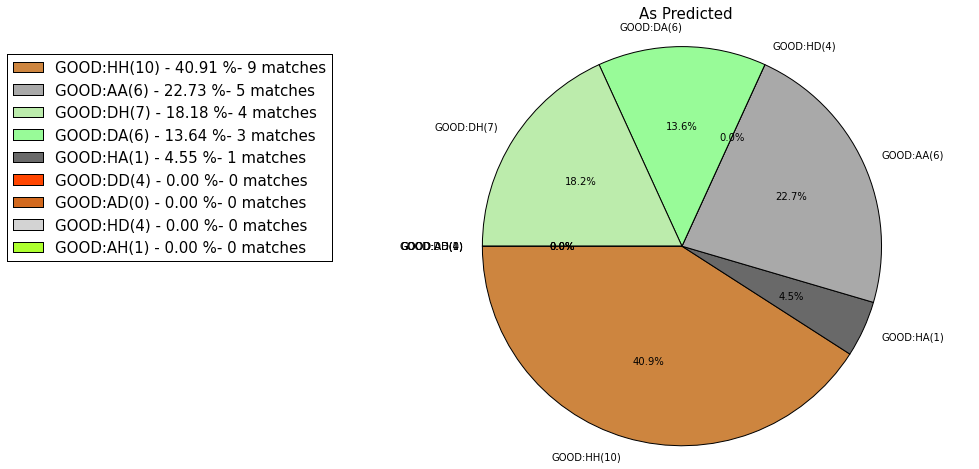

In [51]:
plotPie.PlotPieCondtions(dicGood, 'As Predicted')

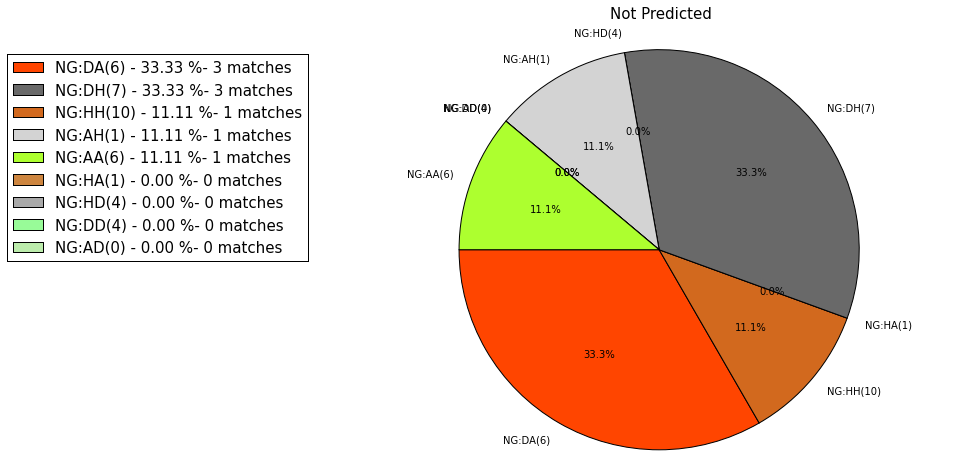

In [52]:
plotPie.PlotPieCondtions(dicNG, 'Not Predicted')

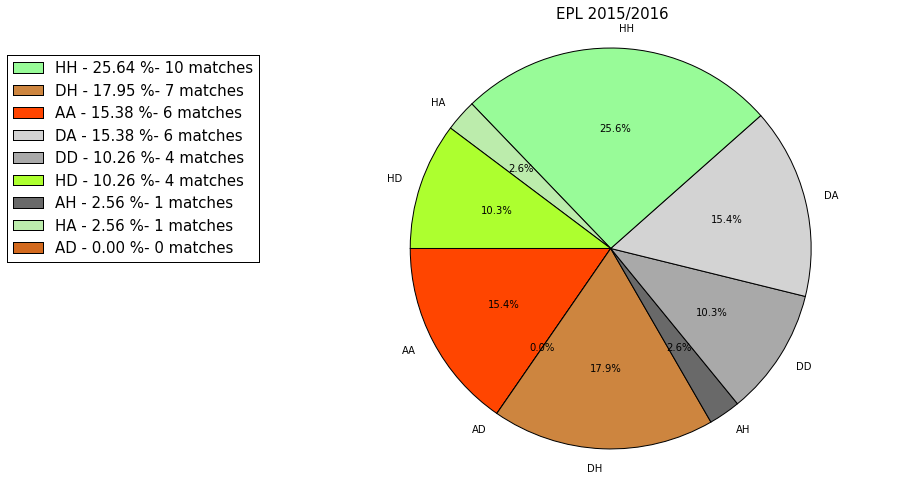

In [53]:
dicLats = plotPie.DicConditionsAndPlotPie(dfLats, 'EPL 2015/2016', True)

In [58]:
dfLats.ix[(dfLats['condition'] == 'HH')]

,Home Team,Away Team,POS_home,NEG_home,POS_away,NEG_away,POS % (home),POS % (away),NEG % (home),NEG % (away),HT(H),HT(A),FT(H),FT(A),Predict,condition,A Predict
7,Southampton,Norwich,736,494,370,502,0.598374,0.424312,0.405869,0.523868,1,0,3,0,GOOD,HH,GOOD
9,Everton,Chelsea,1545,1485,5691,6104,0.509901,0.482493,0.490099,0.517507,2,1,3,1,GOOD,HH,GOOD
10,Arsenal,Stoke,2629,1786,106,133,0.595470,0.443515,0.445216,0.530726,1,0,2,0,GOOD,HH,GOOD
12,Norwich,Bournemouth,228,128,82,53,0.640449,0.607407,0.373563,0.372093,1,0,3,1,GOOD,HH,GOOD
18,WestHam,Newcastle,844,328,853,1024,0.720137,0.454449,0.366780,0.581307,1,0,2,0,GOOD,HH,GOOD
21,Bournemouth,Sunderland,453,389,329,414,0.538005,0.442799,0.476995,0.568596,2,0,2,0,GOOD,HH,GOOD
31,Liverpool,Villa,3139,2257,310,361,0.581727,0.461997,0.447056,0.463150,1,0,3,2,GOOD,HH,GOOD
32,United,Sunderland,15719,11581,201,251,0.575788,0.444690,0.424212,0.555310,1,0,3,0,GOOD,HH,GOOD
33,Southampton,Swansea,176,158,67,32,0.526946,0.676768,0.477842,0.385714,1,0,3,1,NG,HH,NG
34,Stoke,Bournemouth,56,56,76,192,0.500000,0.283582,0.425000,0.685714,1,0,2,1,GOOD,HH,GOOD


In [55]:
dfLats[dfLats['condition'] == 'DA']

,Home Team,Away Team,POS_home,NEG_home,POS_away,NEG_away,POS % (home),POS % (away),NEG % (home),NEG % (away),HT(H),HT(A),FT(H),FT(A),Predict,condition,A Predict
0,Newcastle,Arsenal,1703,2308,2361,2146,0.424582,0.523852,0.590539,0.482810,0,0,0,1,GOOD,DA,GOOD
3,Chelsea,Crystal,1787,1064,162,175,0.626798,0.480712,0.373563,0.512552,0,0,1,2,NG,DA,NG
11,Crystal,City,186,167,1361,784,0.526912,0.634499,0.447566,0.375243,0,0,0,1,GOOD,DA,GOOD
16,Sunderland,Tottenham,425,254,912,860,0.625920,0.514673,0.445933,0.471530,0,0,0,1,NG,DA,NG
28,Southampton,United,430,227,15017,7089,0.654490,0.679318,0.353635,0.379515,1,1,2,3,GOOD,DA,GOOD
37,Watford,Crystal,99,16,73,34,0.860870,0.682243,0.139706,0.311111,0,0,0,1,NG,DA,NG
